In [17]:
from openbabel import openbabel as ob

conv = ob.OBConversion()
conv.SetInFormat("sdf")
conv.SetOutFormat("mol")

obmol = ob.OBMol()
notatend = conv.ReadFile(obmol,"/opt/xchem-fragalysis-2/mferla/ASAP/Zika/XX01ZVNS2B.corrected.sdf")
while notatend:
    obmol.CorrectForPH(7.4)
    obmol.AddHydrogens()
    conv.WriteFile(obmol, f'mols/{obmol.GetTitle()}.mol')
    # next
    obmol = ob.OBMol()
    notatend = conv.Read(obmol)

In [23]:
!mkdir openmm_output
source $CONDA_PREFIX/etc/profile.d/conda.sh
conda activate openmm
cd /opt/xchem-fragalysis-2/mferla/ASAP/Zika


In [ ]:
source $CONDA_PREFIX/etc/profile.d/conda.sh
conda activate openmm
cd /opt/xchem-fragalysis-2/mferla/ASAP/Zika

print('export TEMPLATE=/opt/xchem-fragalysis-2/mferla/ASAP/Zika/template2.pdb')
print('export NSTEPS=500_000')
from pathlib import Path

for path in Path('mols').glob('*.mol'):
    print(f'export VC={path.absolute().as_posix()};')
    print('python /opt/xchem-fragalysis-2/mferla/slurmland/openmm_validation.py;');
    print("""curl -X POST -H 'Content-type: application/json' --data '{"text":"OpenMM '$VC' complete"}' $SLACK_WEBHOOK)""")

In [22]:
!rm /opt/xchem-fragalysis-2/mferla/ASAP/Zika/mols/.mol

In [274]:
info = {}
import pandas as pd
from pathlib import Path

for path in Path('openmm_output').glob('*.pkl.gz'):
    #print(path.stem)
    rmsd_df = pd.read_pickle(path)
    info[path.stem.replace('.pkl', '')] = rmsd_df.RMSD.describe()

wobble = pd.DataFrame(info).transpose().sort_values('std')
wobble.round(2)

,count,mean,std,min,25%,50%,75%,max
x0435_0B,500.0,0.20,0.04,0.0,0.17,0.20,0.22,0.36
x0559_0B,118.0,0.16,0.05,0.0,0.13,0.16,0.18,0.30
x0422_0B,500.0,0.22,0.06,0.0,0.17,0.21,0.25,0.46
x0182_0B,500.0,0.85,0.10,0.0,0.80,0.85,0.89,1.16
x0429_0B,500.0,0.83,0.12,0.0,0.76,0.82,0.88,1.50
x0229_0B,471.0,0.73,0.14,0.0,0.64,0.73,0.83,1.04
x1098_0B,500.0,0.53,0.16,0.0,0.39,0.57,0.67,0.89
x0472_0B,500.0,0.65,0.16,0.0,0.58,0.67,0.76,1.22
x0917_0B,500.0,1.12,0.17,0.0,1.01,1.13,1.25,1.52
x0990_0B,438.0,0.72,0.17,0.0,0.62,0.73,0.85,1.07


In [344]:
wobble.loc[(wobble['max'] < 2.) & (wobble['std'] < 0.5) & (wobble['mean'] < 1.)].sort_values('50%')

,count,mean,std,min,25%,50%,75%,max
x0559_0B,118.0,0.158893,0.045633,4.675773e-08,0.125998,0.155286,0.183663,0.301284
x0435_0B,500.0,0.200382,0.042041,5.960464e-08,0.172887,0.195469,0.224740,0.359980
x0422_0B,500.0,0.217704,0.059371,8.177690e-08,0.174671,0.209120,0.251578,0.460560
x0465_0B,8.0,0.336619,0.181812,0.000000e+00,0.301016,0.366761,0.388310,0.639892
x0404_0B,47.0,0.507693,0.176849,8.300669e-08,0.390640,0.545823,0.638692,0.798864
x0727_0B,500.0,0.572873,0.175429,5.083101e-08,0.442960,0.557947,0.746465,0.904018
x1098_0B,500.0,0.530600,0.159540,6.261179e-08,0.393510,0.571353,0.665617,0.888670
x0443_0B,500.0,0.533404,0.215181,5.331201e-08,0.341933,0.573052,0.744783,0.825970
x0773_1B,500.0,0.448627,0.228471,4.971371e-08,0.203964,0.581620,0.656389,0.769189
x0455_0B,500.0,0.574186,0.302769,0.000000e+00,0.281936,0.602325,0.875320,0.967072


In [277]:
from rdkit import Chem
from rdkit.Chem import Draw
Draw.IPythonConsole.drawOptions.addAtomIndices = True
import MDAnalysis as mda
from MDAnalysis.analysis import align
from MDAnalysis.analysis import rms
import plotly.express as px
import plotly.io as pio
pio.renderers.default='iframe'
import pandas as pd

# Load the topology and trajectory
u = mda.Universe('openmm_output/template2-x0051_0B.min.pdb', 'openmm_output/template2-x0051_0B-x0051_0B.dcd')

# superpose frames
aligner = align.AlignTraj(u, u, select="backbone", in_memory=True)
aligner.run()

# Set up the RMSD calculation
selection = "resname LIG"
R = rms.RMSD(u.select_atoms(selection), u.select_atoms(selection), select=selection, ref_frame=0)
R.run()

# Create a DataFrame for the RMSD values
rmsd_df = pd.DataFrame({
    'Frame': R.results.rmsd[:, 1],
    'RMSD': R.results.rmsd[:, 2]
})

# Plot the RMSD values using Plotly Express
fig = px.line(rmsd_df, x='Frame', y='RMSD', title='RMSD per Frame', labels={'Frame': 'Frame', 'RMSD': 'RMSD (Å)'})
fig.show()

/opt/xchem-fragalysis-2/mferla/waconda-slurm/envs/openmm/lib/python3.10/site-packages/MDAnalysis/topology/PDBParser.py:290: UserWarning:

PDB file is missing resid information.  Defaulted to '1'

/opt/xchem-fragalysis-2/mferla/waconda-slurm/envs/openmm/lib/python3.10/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning:

DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.



In [278]:
import numpy as np
from rdkit import Chem
from typing import Dict

def calc_mean_closest_dist(universe) -> Dict[str, float]:
    ligand = universe.select_atoms("resname LIG")
    nearby_protein_atoms = universe.select_atoms(f"protein")
    num_frames = len(universe.trajectory)
    num_ligand_atoms = len(ligand)
    num_protein_atoms = len(nearby_protein_atoms)
    # Get distances
    distances = np.zeros((num_frames, num_ligand_atoms, num_protein_atoms))
    for i, ts in enumerate(u.trajectory):
        dist_matrix = np.linalg.norm(
            ligand.positions[:, np.newaxis, :] - nearby_protein_atoms.positions[np.newaxis, :, :],
            axis=2
        )
        distances[i] = dist_matrix
    names = [f'{n}{i}:{c}' for n, i, c in zip(nearby_protein_atoms.resnames, nearby_protein_atoms.resnums, nearby_protein_atoms.chainIDs)]
    rearranged = {name: [] for name in names}
    for i, name in enumerate(names):
        rearranged[name].append(distances[:, :, i].min(axis=1))
    return {name: np.concatenate(lv).mean() for name, lv in rearranged.items()}

In [279]:
from pathlib import Path
from rdkit import Chem
from rdkit.Chem import Draw
Draw.IPythonConsole.drawOptions.addAtomIndices = True
import MDAnalysis as mda
from MDAnalysis.analysis import align
from MDAnalysis.analysis import rms
import plotly.express as px
import plotly.io as pio
pio.renderers.default='iframe'
import pandas as pd

distances = {}
for path in Path('openmm_output').glob('*.dcd'):
    temp_name = path.stem.split('-')[0]
    mol_name = path.stem.split('-')[1]
    u = mda.Universe(f'openmm_output/{temp_name}-{mol_name}.min.pdb', f'openmm_output/{temp_name}-{mol_name}-{mol_name}.dcd')
    aligner = align.AlignTraj(u, u, select="backbone", in_memory=True)
    aligner.run()
    distances[mol_name] = calc_mean_closest_dist(u)

/opt/xchem-fragalysis-2/mferla/waconda-slurm/envs/openmm/lib/python3.10/site-packages/MDAnalysis/topology/PDBParser.py:290: UserWarning:

PDB file is missing resid information.  Defaulted to '1'

/opt/xchem-fragalysis-2/mferla/waconda-slurm/envs/openmm/lib/python3.10/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning:

DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.



In [280]:
dists = pd.DataFrame(distances).transpose()

In [281]:
nearby_protein_atoms = u.select_atoms(f"protein")
wrong_names = [f'{n}{i}:{c}' for n, i, c in zip(nearby_protein_atoms.resnames, nearby_protein_atoms.resnums, nearby_protein_atoms.chainIDs)]
offsets = {'A': 50, 'B': 16}
off_names = [f'{n}{i+offsets[c] - 1}:{c}' for n, i, c in zip(nearby_protein_atoms.resnames, nearby_protein_atoms.resnums, nearby_protein_atoms.chainIDs)]

dists=dists.rename(columns=dict(zip(wrong_names, off_names)))

In [324]:
dists = dists[dists.columns[dists.min() < 4.0]]
new_names = {c: f'RMSD_{c}' for c in wobble.columns}
new_names['50%'] = 'RMSD_median'
df = pd.concat([dists, wobble.rename(columns=new_names)], axis=1)

In [325]:
from sklearn.manifold import TSNE
import plotly.express as px
import plotly.graph_objects as go

tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(dists)
tsne_df = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])
tsne_df.index = dists.index
tsne_df['predictor'] = df['RMSD_mean'].fillna(2).values

centroids = {}
for resn in dists.columns:
    values = dists[resn].values
    mean_tSNE1 = tsne_df.loc[dists[resn] < 4.0].TSNE1.mean()
    mean_tSNE2 = tsne_df.loc[dists[resn] < 4.0].TSNE2.mean()
    centroids[resn] = [mean_tSNE1, mean_tSNE2]


fig = px.scatter(tsne_df, x='TSNE1', y='TSNE2', color='predictor', title='t-SNE Plot')
for resn, (cx, cy) in centroids.items():
    fig.add_trace(go.Scatter(
        x=[cx],
        y=[cy],
        mode='markers+text',
        marker=dict(symbol='x', size=12, color='black'),
        text=resn,
        textposition='top center',
        name=resn
    ))

fig

In [326]:
(dists < 4.5).sum()

SER81:A      2
GLY82:A      2
ASP83:A      3
VAL36:B      1
HIS51:B      5
VAL52:B      1
GLY55:B      1
GLY70:B      1
VAL72:B      1
GLN74:B      1
ASP75:B      2
GLY121:B     1
ILE123:B     1
ASP129:B    10
PRO131:B     3
ALA132:B    40
SER135:B    38
GLY151:B    37
ASN152:B     5
GLY153:B     1
TYR161:B    33
dtype: int64

In [327]:
cutoff = 5
corr = df[[c for c, b in ((dists < cutoff).sum() >= 2).items() if b] + ['RMSD_mean', 'RMSD_std', 'RMSD_max',]].fillna(2).corr()
pd.concat([corr[['RMSD_mean', 'RMSD_std']].sort_values('RMSD_mean').round(2).RMSD_mean, (dists < cutoff).sum()], axis=1)

,RMSD_mean,0
ASP129:B,-0.12,15.0
GLY121:B,-0.06,2.0
ILE123:B,-0.04,2.0
PRO131:B,0.04,12.0
TYR161:B,0.04,39.0
ALA132:B,0.22,40.0
GLY151:B,0.22,38.0
SER135:B,0.27,39.0
ASN152:B,0.28,6.0
GLY82:A,0.37,3.0


In [296]:
sum(df.RMSD_mean < 1), len(df)

(34, 49)

In [348]:
px.histogram(df, 'RMSD_median')

In [361]:
meta = pd.read_csv('metadata.csv')
meta['xcode'] = meta.crystal_name.str.extract(r'-(x\d+)_')

In [ ]:
      2
GLY82:A      2
      3
VAL36:B      1
      5
VAL52:B      1
GLY55:B      1
GLY70:B      1
VAL72:B      1
GLN74:B      1
      2
GLY121:B     1
ILE123:B     1
ASP129:B    10
PRO131:B     3
ALA132:B    40
    38
    37
ASN152:B     5
GLY153:B     1
    33

In [385]:
x2z = meta.set_index('xcode')['alternate_name'].to_dict()
df['zcode'] = df.index.to_series().str.extract(r'(x\d+)_')[0].map(x2z)
df.sort_values('RMSD_median').round(2)\
[['zcode', 'RMSD_count', 'RMSD_median','RMSD_std', 'RMSD_max', 'SER135:B', 'HIS51:B','ASP75:B', 'GLY151:B', 'TYR161:B', 'ASP129:B', 'ASP83:A']]\
.to_csv('rsmd.csv')

In [384]:
' '.join(df.sort_values('RMSD_median').index.to_list())

'x0559_0B x0435_0B x0422_0B x0465_0B x0846_0B x0404_0B x0727_0B x1098_0B x0443_0B x0773_1B x0455_0B x0969_1B x0945_0B x0553_0B x0605_0B x0773_0B x0589_0B x0969_0B x0472_0B x0693_0B x0990_0B x0051_0B x0229_0B x0846_1B x0386_0B x0904_0B x0429_0B x0182_0B x0803_0B x0089_0B x0788_1B x0425_0B x0680_0B x0951_0B x0101_0B x0852_0B x0917_0B x0382_0B x0687_0B x0788_0B x0490_0B x0800_0B x0227_0B x0182_1B x0884_1B x0884_0B x0788_2B x0917_1B x0990_1B'

In [387]:
df.sort_values('RMSD_median').round(2)\
[['zcode', 'RMSD_count', 'RMSD_median','RMSD_std', 'RMSD_max', 'SER135:B', 'HIS51:B','ASP75:B', 'GLY151:B', 'TYR161:B', 'ASP129:B', 'ASP83:A']]

,zcode,RMSD_count,RMSD_median,RMSD_std,RMSD_max,SER135:B,HIS51:B,ASP75:B,GLY151:B,TYR161:B,ASP129:B,ASP83:A
x0559_0B,Z1198149728,118.0,0.16,0.05,0.30,3.97,5.66,8.63,3.45,4.84,6.49,9.73
x0435_0B,Z362020366,500.0,0.20,0.04,0.36,3.87,6.58,9.43,3.59,4.36,5.62,10.57
x0422_0B,Z119990326,500.0,0.21,0.06,0.46,3.72,6.83,9.42,3.58,4.37,6.33,10.23
x0465_0B,Z31113727,8.0,0.37,0.18,0.64,3.88,7.03,10.07,4.43,3.88,5.36,9.89
x0846_0B,Z1587220559,500.0,0.44,0.53,1.91,3.99,4.83,10.21,6.26,9.60,12.41,10.40
x0404_0B,Z425338146,47.0,0.55,0.18,0.80,4.08,3.53,4.19,4.73,6.76,10.11,3.81
x0727_0B,Z1216833237,500.0,0.56,0.18,0.90,3.79,6.09,8.97,3.54,4.11,5.50,9.89
x1098_0B,Z396117078,500.0,0.57,0.16,0.89,3.54,3.97,4.80,3.38,4.51,6.71,4.64
x0443_0B,Z56791928,500.0,0.57,0.22,0.83,3.64,5.47,8.53,3.46,4.92,6.40,9.28
x0773_1B,Z1269220427,500.0,0.58,0.23,0.77,16.25,11.05,9.56,16.74,23.21,27.28,14.37


In [343]:
for name, row in df.sort_values('RMSD_median').iterrows():
    print(name, row.RMSD_median, {c: d for c, d in row.items() if d < 4 and ':' in c})

x0559_0B 0.15528637100017537 {'ALA132:B': 3.8024677595849763, 'SER135:B': 3.9736424320835178, 'GLY151:B': 3.4511660722785655}
x0435_0B 0.19546941092492326 {'SER135:B': 3.868534320636229, 'GLY151:B': 3.594312865121024}
x0422_0B 0.20911990494812216 {'SER135:B': 3.7183333393877205, 'GLY151:B': 3.581710152081081}
x0465_0B 0.36676067231072673 {'ALA132:B': 3.5308071076869965, 'SER135:B': 3.8840966007926245, 'TYR161:B': 3.883886304639635}
x0846_0B 0.4434135751076704 {'VAL36:B': 3.758297190964222, 'VAL52:B': 3.861763477474451, 'ALA132:B': 3.7728164221525193, 'SER135:B': 3.9901697054559535}
x0404_0B 0.5458226563574518 {'GLY82:A': 3.443556793554938, 'ASP83:A': 3.8064431457232075, 'HIS51:B': 3.534099747749682, 'ALA132:B': 3.6470549205516245, 'ASN152:B': 3.9503426088025866}
x0727_0B 0.5579471663313053 {'SER135:B': 3.787336225791411, 'GLY151:B': 3.5409388919898444}
x1098_0B 0.5713525011190526 {'HIS51:B': 3.9652051376314725, 'ALA132:B': 3.9177273461818696, 'SER135:B': 3.538338568622416, 'GLY151:B': 

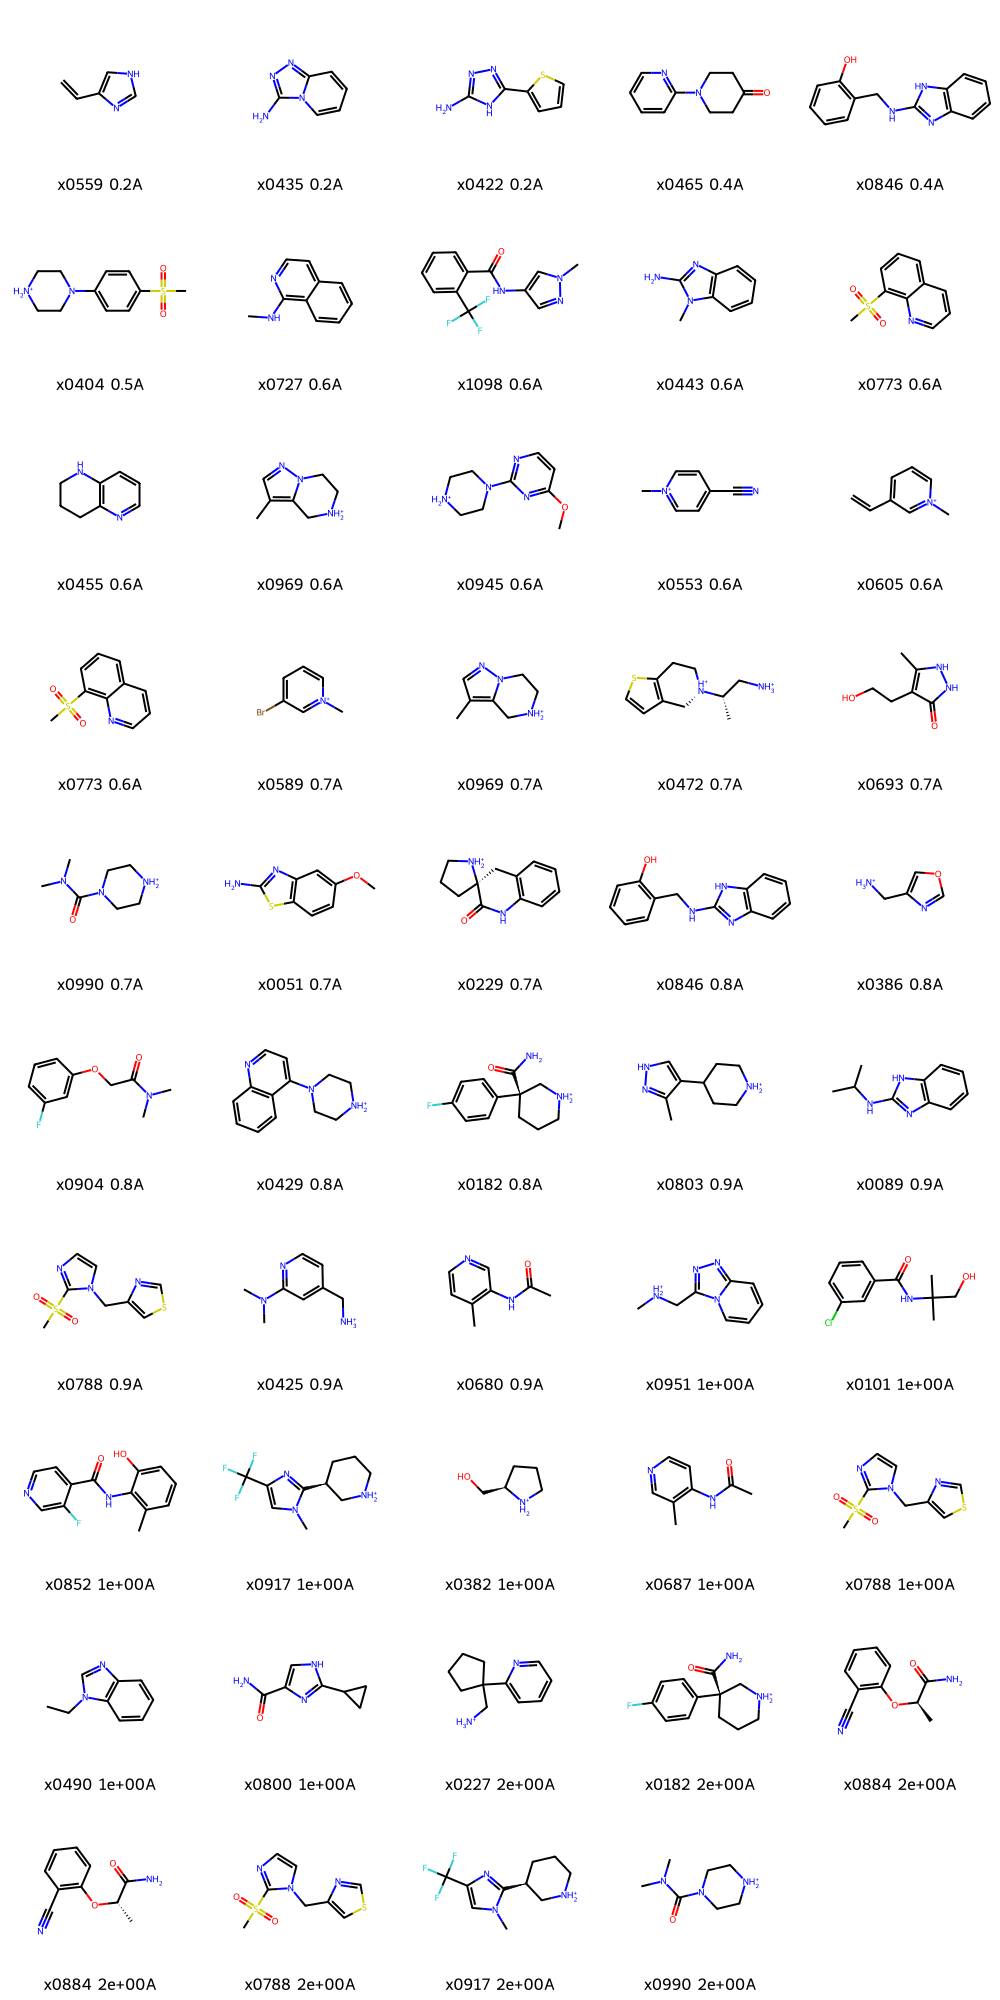

In [337]:
from rdkit.Chem import Draw, AllChem
Draw.IPythonConsole.drawOptions.addAtomIndices = False

col = df.sort_values('RMSD_median').head(50).RMSD_median
legends = [f'{k.split("_")[0]} {v:.1}A' for k,v in col.items()]
mols = [Chem.MolFromMolFile(f'mols/{name}.mol') for name in col.index]
for mol in mols:
    AllChem.Compute2DCoords(mol)

Draw.MolsToGridImage(mols, legends=legends, molsPerRow=5)

In [342]:
# m = df[[c for c in df.columns if ':' in c]].max().max()
# blue_white = [
#     [0.0, 'blue'],
#     [3/m, 'gainsboro'],
#     [1.0, 'white']
# ]
# columns = sorted([c for c in df.columns if ':' in c], key=lambda c: int(c[3:-2])+{'A': 0,'B': 500}[c[-1]])
fig = px.imshow(df.sort_values('RMSD_mean')[columns].transpose(),
          color_continuous_scale=blue_white)
fig.update_layout(
    yaxis=dict(
        tickmode='auto',
        tickfont=dict(size=8),
        automargin=True,
    )
)
fig

In [322]:
df.to_pickle('MD_analysis.pkl.gz')

In [346]:
wobble

,count,mean,std,min,25%,50%,75%,max
x0435_0B,500.0,0.200382,0.042041,5.960464e-08,0.172887,0.195469,0.224740,0.359980
x0559_0B,118.0,0.158893,0.045633,4.675773e-08,0.125998,0.155286,0.183663,0.301284
x0422_0B,500.0,0.217704,0.059371,8.177690e-08,0.174671,0.209120,0.251578,0.460560
x0182_0B,500.0,0.850999,0.098508,5.960464e-08,0.800328,0.845737,0.891611,1.162911
x0429_0B,500.0,0.829011,0.123671,5.960464e-08,0.764968,0.815871,0.876666,1.503444
x0229_0B,471.0,0.729658,0.138659,6.155941e-08,0.642595,0.733985,0.834673,1.036749
x1098_0B,500.0,0.530600,0.159540,6.261179e-08,0.393510,0.571353,0.665617,0.888670
x0472_0B,500.0,0.654072,0.164399,8.564248e-08,0.578047,0.667200,0.761566,1.221058
x0917_0B,500.0,1.118596,0.168163,0.000000e+00,1.012723,1.127287,1.246294,1.523011
x0990_0B,438.0,0.717399,0.173939,6.488932e-08,0.623994,0.726058,0.848389,1.073375


In [273]:
## Fix broken entries!

import MDAnalysis as mda
from MDAnalysis.analysis import align
from MDAnalysis.analysis import rms
import plotly.express as px
import plotly.io as pio
pio.renderers.default='iframe'
import pandas as pd


template_filename = 'template2'
for mol_name in df.loc[df.RMSD_mean.isna()].index:
    prepped_filename = f'openmm_output/{template_filename}-{mol_name}.min.pdb'
    assert Path(prepped_filename).exists()
    traj_filename = f'openmm_output/{template_filename}-{mol_name}-{mol_name}.dcd'
    assert Path(traj_filename).exists()
    
    # Load the topology and trajectory
    u = mda.Universe(prepped_filename, traj_filename)
    
    # superpose frames
    aligner = align.AlignTraj(u, u, select="backbone", in_memory=True)
    aligner.run()
    
    # Set up the RMSD calculation
    selection = "resname LIG"
    R = rms.RMSD(u.select_atoms(selection), u.select_atoms(selection), select=selection, ref_frame=0)
    R.run()
    
    # Create a DataFrame for the RMSD values
    rmsd_df = pd.DataFrame({
        'Frame': R.results.rmsd[:, 1],
        'RMSD': R.results.rmsd[:, 2]
    })
    
    rmsd_df.to_pickle(f'openmm_output/{mol_name}.pkl.gz')


/opt/xchem-fragalysis-2/mferla/waconda-slurm/envs/openmm/lib/python3.10/site-packages/MDAnalysis/topology/PDBParser.py:290: UserWarning:

PDB file is missing resid information.  Defaulted to '1'

/opt/xchem-fragalysis-2/mferla/waconda-slurm/envs/openmm/lib/python3.10/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning:

DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.



In [ ]:
show sticks, not resn HOH
hide lines, resn HOH
zoom resn LIG
color coral, resn LIG and element C
color turquoise, polymer and element C
intra_fit byres resn LIG around 4, 1